# Importing Essential Packages

In [135]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# heart_rate dataset EDA

Firstly, loading the dataset and sampling the first 5 samples in the dataset.

In [136]:
# Load the dataset
url = 'https://raw.githubusercontent.com/Welltory/hrv-covid19/refs/heads/master/data/heart_rate.csv'
df = pd.read_csv(url)

# Display the first 5 rows to verify the dataset
print(df.head(5))

    user_code             datetime  heart_rate  is_resting
0  007b8190cf  2020-04-26 04:49:25          70           0
1  01bad5a519  2020-04-23 06:21:03          74           0
2  01bad5a519  2020-04-23 09:46:01          82           0
3  01bad5a519  2020-04-23 14:05:06          90           0
4  01bad5a519  2020-04-24 03:41:18          72           0


# Data structure

In the heart_reate dataset, there are 523783 rows and 4 columns. The 4 columns are user_code, datetime (which are object), heart_rate and is_resting (which are int).

## Descriptive Statistics
The max and min for heart_rate are 232 and 10, the standard deviation and mean are 25.054152 and 90.856626. is_resting has min value of 0 and max value of 1. Its standard deviation and mean are 0.074266 and 0.005546.


In [137]:
# Data Structure
print("Data Structure")
print("---------------")
print(f"Dataset Information: ")
print(f"Dimensions: {df.shape}")
print(f"\nData Description:\n{df.describe()}")


Data Structure
---------------
Dataset Information: 
Dimensions: (523783, 4)

Data Description:
          heart_rate     is_resting
count  523783.000000  523783.000000
mean       90.856626       0.005546
std        25.054152       0.074266
min        10.000000       0.000000
25%        71.000000       0.000000
50%        87.000000       0.000000
75%       108.000000       0.000000
max       232.000000       1.000000


## Distribution Analysis
### Skeweness
In this case, the is_resting column is heavily right-skewed (skewness of 13.315801), indicating that most is_resting values are lower (0s), with some much higher values (1s) pulling the distribution to the right.

The heart_rate column is a slightly right-skewed (0.627198). It indicates that only a few values pulling the mean to the right. While the data is not perfectly symmetric, the skewness is moderate and the data is balanced.
### Kurtosis
In this case, the is_resting has heavier tails, meaning there are more outliers (extreme values) than a normal distribution.Since this varible is more like a categorical varible, so it can be seen as normal.

The heart_rate has a Kurtosis of 0.032379, which is nealy to zero. It indicates that this data is very close to a normal distribution.

In [138]:
# Exclude non-numerical columns in the dataset before performing correlation calculation
df_numeric = df.select_dtypes(include=['int64'])

# Check for distribution normality (skewness and kurtosis)
print("\nDistribution Measures:")
print("------------------------")
print(df_numeric.skew())
print(df_numeric.kurt())


Distribution Measures:
------------------------
heart_rate     0.627198
is_resting    13.315801
dtype: float64
heart_rate      0.032379
is_resting    175.311221
dtype: float64


### Visualization of 'is_resting" column

Based on the histogram, majority of its values are 0s, and only a few of them are 1s.

Thinking about handling imbalanced data: If this is a binary variable and one class is very underrepresented, consider balancing techniques like over-sampling or under-sampling if you're planning on using this variable in a predictive model.

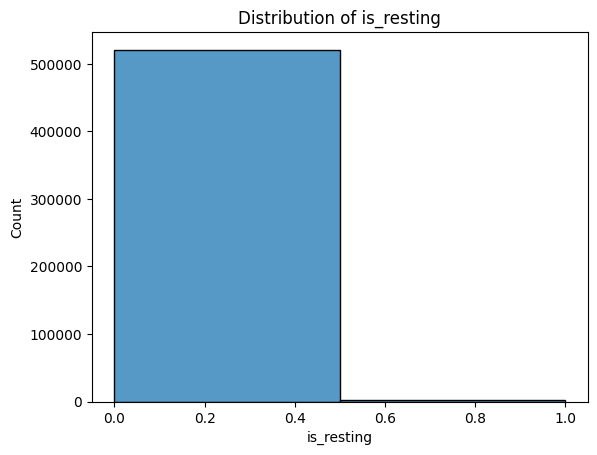

In [139]:

# Visualize the distribution of 'is_resting'
sns.histplot(df['is_resting'], bins=2)
plt.title('Distribution of is_resting')
plt.show()

## Variable Relationships

The correlation Matrix was calculated for testing varible relationships.
There are two numerical varibles in this dataset, heart_rate and is_resting.
Based on the result, these two varibles show a near zero correlation (-0.084).

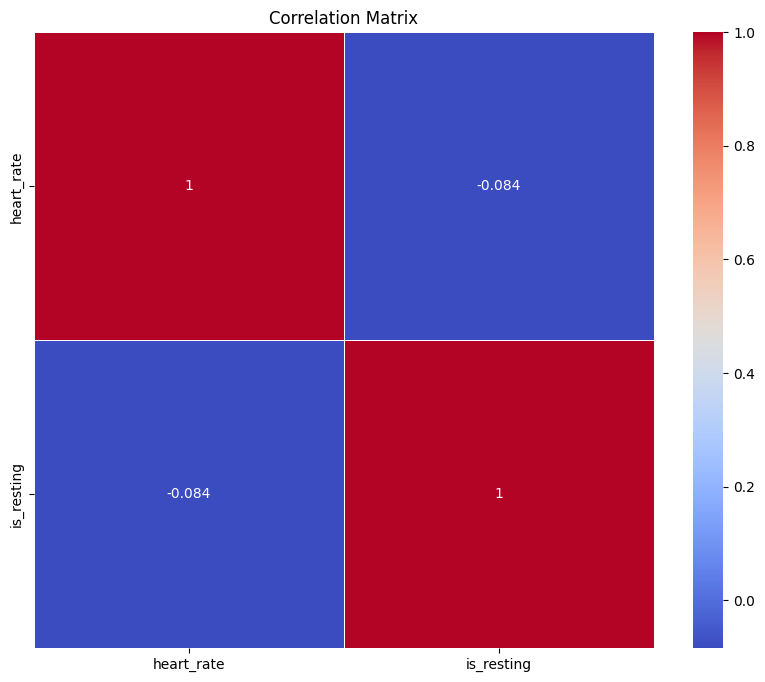

In [140]:


# Compute the correlation matrix
correlation_matrix = df_numeric.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

## Data Quality
There is no missing data, no duplicates in this dataset.
The most common values indicates that user 35c7355282 could be overrespented if the study is testing multiple users.
The most common heart_rate value is 78, which is a typical heart rate for a resting individual.

In [141]:
# Data Quality
print("\nData Quality")
print("------------")
print(f"Missing Values:\n{df.isnull().sum()}")
print(f"\nDuplicated Rows: {df.duplicated().sum()}")
print("\nChecking for Inconsistent Values:")
print(df.apply(lambda x: x.value_counts().index[0]).to_frame('most_frequent_value'))


Data Quality
------------
Missing Values:
user_code     0
datetime      0
heart_rate    0
is_resting    0
dtype: int64

Duplicated Rows: 0

Checking for Inconsistent Values:
            most_frequent_value
user_code            35c7355282
datetime    2020-05-10 13:00:00
heart_rate                   78
is_resting                    0


# Boxplot of heart_rate column

The boxplot shows several high heart rate values that are considered outliers. These are points beyond the whiskers are marked as small dots and represent heart rates greater than 150 bpm.

<Axes: xlabel='heart_rate'>

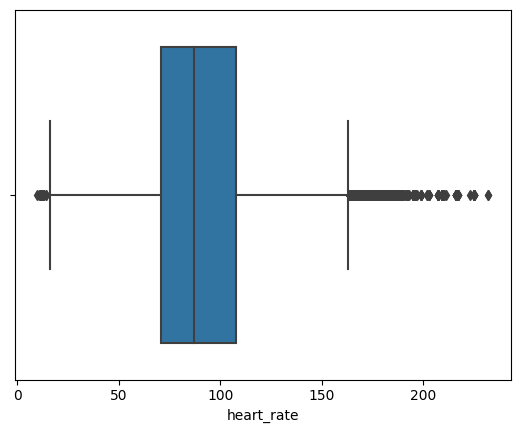

In [142]:
sns.boxplot(x=df['heart_rate'])

## Histogram of Heart_rate
In order to investigate outliers of heart_rate, a histogram was created. Based on the histogram of the hear_rate, the distribution of heart_rate is close to a standard distrubution, and the outliers (which mostly lie between 70 and 110 bpm) are not unrealistic. High heart_rate could caused by intense exercise.

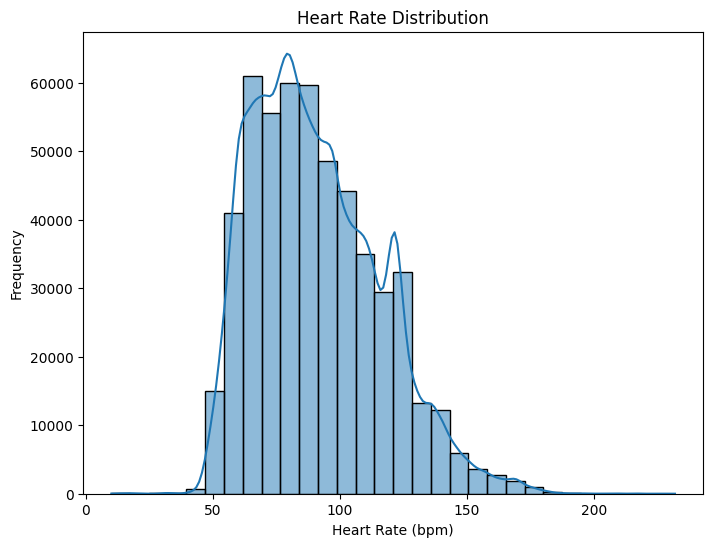

In [143]:

# Create a histogram to visualize the heart_rate distribution
plt.figure(figsize=(8,6))
sns.histplot(df['heart_rate'], bins=30, kde=True)
plt.title('Heart Rate Distribution')
plt.xlabel('Heart Rate (bpm)')
plt.ylabel('Frequency')
plt.show()


## Handling Outliers

Handling outliers: In this case, I decide to trim this data because some of high heart_rate represent valid data while some extrem high/low values are non-relistic. Other options for handling outliers are removal and transformation.

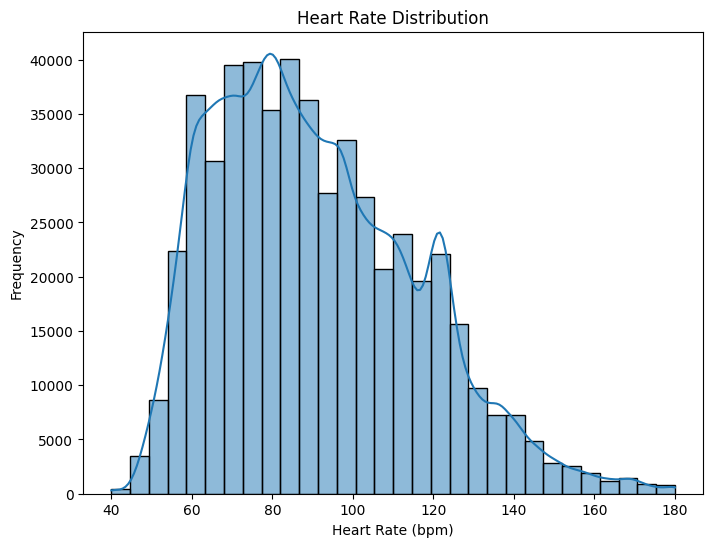

In [144]:
df['heart_rate'] = df['heart_rate'].clip(lower=40, upper=180)

# Create a histogram to visualize the heart_rate distribution
plt.figure(figsize=(8,6))
sns.histplot(df['heart_rate'], bins=30, kde=True)
plt.title('Heart Rate Distribution')
plt.xlabel('Heart Rate (bpm)')
plt.ylabel('Frequency')
plt.show()

## Discussion of strategies for Handling Missing Values, Removing Duplicates

### Handling Missing Values:
#### The strategies to handle missing values are: 
1. Removing Missing Data when the number of missing values is very small.
2. When a significant portion of the data is missing, replacing missing values with the mean, median, or using more sophisticated methods.
3. In time-series datasets, nearby data points can be filled in.
4. Marking Missing Values: In some cases, keeping track of where values are missing (creating a new column that marks missing values) can add insight to the analysis.
#### Handling Duplicates:
1. Identifying duplicates, for example using .duplicated() to identify duplicates and remove them to avoid redundancy in the analysis.
2. Regarding partial duplicate, use the subset argument to remove duplicates based on specific columns.

## New Feature: Heart Rate Variability (HRV)
Context and Rationale:
Heart Rate Variability (HRV) is a measure of the variation in time between successive heartbeats. It can be an indicator of the autonomic nervous system's regulation of the heart and is often used as a measure of stress and recovery. By calculating HRV, we can add valuable information regarding the heart's performance over time.

Approach:
Calculation of HRV:

HRV can be calculated as the standard deviation of the differences between successive heart rates. This gives an indication of how much the heart rate varies over time.
Implementation:

We will use the heart_rate values in the dataset to compute HRV for each user over time. It’s crucial to ensure that the dataset is sorted by user_code and datetime before calculating HRV.

In [146]:
# Sorting the dataset by user_code and datetime
df.sort_values(by=['user_code', 'datetime'], inplace=True)

# Calculate the differences between successive heart rates
df['heart_rate_diff'] = df.groupby('user_code')['heart_rate'].diff()

# Calculate HRV as the standard deviation of these differences for each user
hrv = df.groupby('user_code')['heart_rate_diff'].std().reset_index()

# Rename the HRV column for clarity
hrv.rename(columns={'heart_rate_diff': 'HRV'}, inplace=True)

# Merge the HRV back into the original dataset if desired
df = pd.merge(df, hrv, on='user_code', how='left')

# Display the new feature in the DataFrame
print(df[['user_code', 'datetime', 'heart_rate', 'HRV']].head())


    user_code             datetime  heart_rate        HRV
0  007b8190cf  2020-04-26 04:49:25          70        NaN
1  01bad5a519  2020-04-23 06:21:03          74  11.054129
2  01bad5a519  2020-04-23 09:46:01          82  11.054129
3  01bad5a519  2020-04-23 14:05:06          90  11.054129
4  01bad5a519  2020-04-24 03:41:18          72  11.054129


In [147]:
# Check the number of missing values in the 'HRV' column
missing_values_HRV = df['HRV'].isna().sum()

# Print the result
print(f'The HRV column has {missing_values_HRV} missing values.')


The HRV column has 14 missing values.


Since there are some NaN values in HRV and heart_rate_diff column, so dataset cleaning need to be performed before PCA. I decided to remove missing values in HRV column because of the number of missing values is small. The missing values in the heart_rate_diff column are filled with the column's mean.

In [150]:
# Check for any NaN values in each column
nan_summary = df.isna().sum()

# Print the summary of missing values
print(nan_summary)

#Handling with missing values
df_cleaned = df.dropna(subset=['HRV'])
df_cleaned['heart_rate_diff'].fillna(df_cleaned['heart_rate_diff'].mean(), inplace=True)

# Check for any NaN values in each column
nan_summary = df_cleaned.isna().sum()

# Print the summary of missing values
print(nan_summary)

user_code           0
datetime            0
heart_rate          0
is_resting          0
heart_rate_diff    79
HRV                14
dtype: int64
user_code          0
datetime           0
heart_rate         0
is_resting         0
heart_rate_diff    0
HRV                0
dtype: int64


/var/folders/y9/fqs0r7d55l70cmqlmbj292j00000gn/T/ipykernel_96063/995859993.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['heart_rate_diff'].fillna(df_cleaned['heart_rate_diff'].mean(), inplace=True)


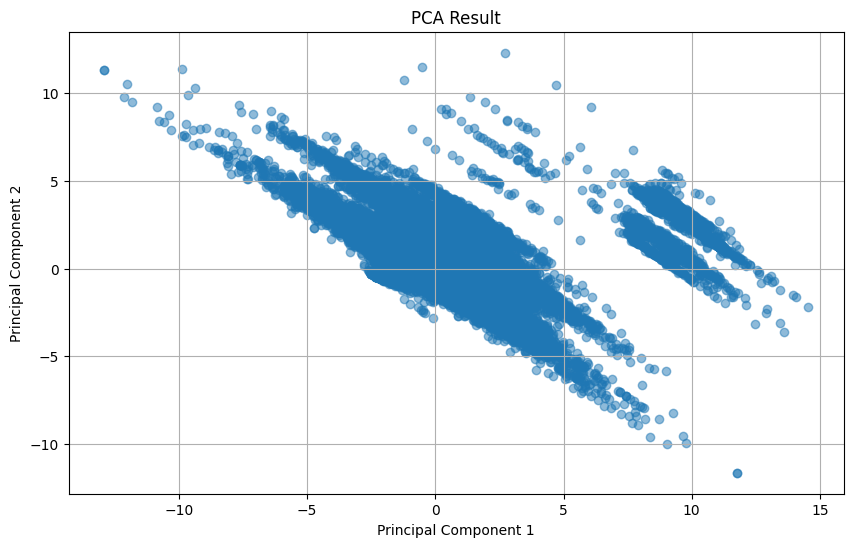

Explained variance by PC1: 0.31
Explained variance by PC2: 0.25


In [149]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Selecting numerical columns (excluding non-numeric ones)
numeric_features = df_cleaned.select_dtypes(include=['float64', 'int64']).columns.tolist()

# Scaling the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_cleaned[numeric_features])

# Performing PCA
pca = PCA(n_components=2)  # Reducing to 2 dimensions for visualization
pca_result = pca.fit_transform(scaled_data)

# Create a DataFrame for PCA results
pca_df = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2'])

# Visualizing the PCA result
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(pca_df['PC1'], pca_df['PC2'], alpha=0.5)
plt.title('PCA Result')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid()
plt.show()

# Explained variance ratio
explained_variance = pca.explained_variance_ratio_
print(f'Explained variance by PC1: {explained_variance[0]:.2f}')
print(f'Explained variance by PC2: {explained_variance[1]:.2f}')


## PCA Discussion
